In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def zero_pad(X,pad):
    x_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant',constant_values=0)
    return x_pad

(4, 3, 3, 2)


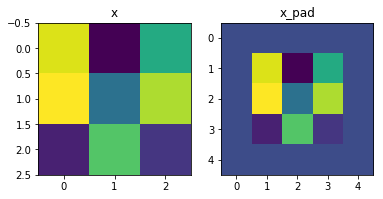

In [22]:
# testing padding 
np.random.seed(1)
x = np.random.randn(4,3,3,2)
print(x.shape)
x_pad = zero_pad(x,1)
#print(x_pad.shape)
#print(x)
#print(x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])


In [23]:
def conv_single_step(a_slice_prev,W,b):
    s = np.multiply(a_slice_prev, W) + b
    Z = np.sum(s)
    return Z

In [28]:
def conv_forward(a_prev,W,b,hyperparameter):
    (m,n_H_prev,n_W_prev,n_C_prev) = a_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hyperparameter['stride']
    pad = hyperparameter['pad']
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    Z = np.zeros((m, n_H, n_W, n_C))
    a_prev_pad = zero_pad(a_prev, pad)
    for i in range(m):
        A_prev_pad = a_prev_pad[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vertical_start = h*stride
                    vertical_end = vertical_start+f
                    horizontal_start =w*stride
                    horizontal_end =horizontal_start+f
                    a_slice_prev = A_prev_pad[vertical_start:vertical_end,horizontal_start:horizontal_end,:]
                    Z[i,h,w,c] = conv_single_step(a_slice_prev,W[:,:,:,c],b[:,:,:,c])
    assert(Z.shape == (m, n_H, n_W, n_C))
    cache = (A_prev, W, b, hparameters)
    return Z, cache

In [29]:
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 2,
               "stride": 1}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print(cache_conv[0][1][2][3])

[-0.20075807  0.18656139  0.41005165]


In [35]:
def pool_fwd(a_prev,hyperparam,mode= "MAX"):
    (m,n_h_prev,n_w_prev,n_c_prev) = a_prev.shape
    f = hyperparam['f']
    stride = hyperparam['stride']
    n_h = int ((n_h_prev-f) / stride) +1
    n_w = int ((n_w_prev-f) / stride) +1
    n_c = n_c_prev
    A = np.zeros((m,n_h,n_w,n_c))
    for i in range(m):
        for h in range(n_h):
            for w in range(n_w):
                for c in range(n_c):
                    vertical_start = h * stride
                    vertical_end = vertical_start + f
                    horizontal_start = w * stride
                    horizontal_end = horizontal_start + f 
                    window_array = a_prev[i,vertical_start:vertical_end,horizontal_start:horizontal_end,c]
                    if(mode=="MAX"):
                        A[i,h,w,c] = np.max(window_array)
                    elif(mode=="AVG"):
                        A[i,h,w,c] = np.avg(window_array)
    cache = (a_prev,hyperparam)
    
    assert(A.shape == (m, n_h, n_w, n_c))
    
    return (A, cache)

In [36]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 1, "f": 4}

A, cache = pool_fwd(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_fwd(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]]

mode = average
A = [[[[0. 0. 0.]]]


 [[[0. 0. 0.]]]]
